### gmarket 베스트 200 상품데이터 수집
- 상품 데이터 수집
- 상품 이미지 데이터 수집

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. 웹서비스 분석 : url

In [9]:
url =f"http://corners.gmarket.co.kr/Bestsellers"

In [3]:
# 2. request(url) > response : html

In [10]:
response = requests.get(url)
response

<Response [200]>

In [4]:
# 3. html(str) > bs,css-selecter > DataFrame

In [11]:
# bs 객체 만들기

In [13]:
dom = BeautifulSoup(response.text, "html.parser")

In [ ]:
# 상품 리스트 200개 선택하기

In [26]:
elements = dom.select("#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li")
len(elements)

200

In [12]:
# 각 상품에서 데이터(상품명, 가격정보, 이미지 URL ...) 수집

In [31]:
element = elements[0]
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get('href'),
    "img": element.select_one("img.lazy").get('data-original'),
    "o_price":element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price > strong > span >span").text,
}
data

{'title': '씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권)',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=962002144&ver=637811369963144820',
 'img': 'http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214',
 'o_price': '79,900원',
 's_price': '24,000원'}

In [ ]:
# 데이터 프레임으로 만들기

In [33]:
datas = []
for element in elements:
    datas.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get('href'),
        "img": element.select_one("img.lazy").get('data-original'),
        "o_price":element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price > strong > span >span").text,
    })
df = pd.DataFrame(datas)
df.tail(3)

,title,link,img,o_price,s_price
197,[네스카페]수프리모 오리지널 300T,http://item.gmarket.co.kr/Item?goodscode=16766...,http://gdimg.gmarket.co.kr/1676697261/still/30...,"33,000원","28,900원"
198,[설화수]설화수 순행 클렌징폼 200ml +미니어처 5종증정,http://item.gmarket.co.kr/Item?goodscode=18706...,http://gdimg.gmarket.co.kr/1870699583/still/30...,"39,900원","29,900원"
199,[더블에이]더블에이 A4 복사용지 80g 4000매 2BOX/A4용지,http://item.gmarket.co.kr/Item?goodscode=77205...,http://gdimg.gmarket.co.kr/772056310/still/300...,"48,960원","42,600원"


In [5]:
# 4. download images

In [34]:
!mkdir datas

In [35]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A0EF-7F3F

 C:\Users\User\WebCrawling 디렉터리

2022-02-22  오후 02:57    <DIR>          .
2022-02-22  오후 02:57    <DIR>          ..
2022-02-22  오후 02:21    <DIR>          .ipynb_checkpoints
2022-02-21  오후 12:04            99,056 01_requests_naver_stock(my).ipynb
2022-02-21  오후 01:00           225,360 01_requests_naver_stock.ipynb
2022-02-21  오후 02:29             9,473 02_kakao_api(my).ipynb
2022-02-21  오후 01:01           404,176 02_requests_naver_stock.ipynb
2022-02-21  오후 01:01           115,048 03_naver_api.ipynb
2022-02-21  오후 04:30            47,232 03_requests_zigbang(my).ipynb
2022-02-21  오후 05:02            16,028 04_requests_headers(my).ipynb
2022-02-21  오후 01:01            15,418 04_requests_zigbang.ipynb
2022-02-22  오전 11:34            15,630 05_html_css_selector(my_day2).ipynb
2022-02-22  오후 01:04             7,981 06_bs4_naver_relational_keyword(my_day2).ipynb
2022-02-22  오후 02:21            23,214 07_mois(my_day2).ipynb
2022-02-22  오후 02:55   

In [36]:
import os

# datas 디렉토리 없으면  datas 디렉토리 만든다
if not os.path.exists("datas"):
    os.makedirs("datas")

In [39]:
img = df.loc[0, "img"]
print(img)

http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214


In [40]:
response = requests.get(img)

In [42]:
with open("datas/test.png", "wb") as file:
    file.write(response.content)

In [45]:
from PIL import Image as pil

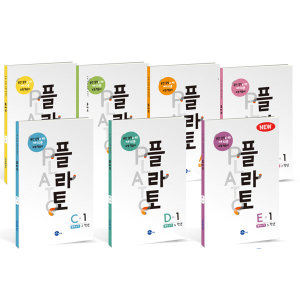

In [46]:
pil.open("datas/test.png")

In [47]:
df.head(2)

,title,link,img,o_price,s_price
0,씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권),http://item.gmarket.co.kr/Item?goodscode=96200...,http://gdimg.gmarket.co.kr/962002144/still/300...,"79,900원","24,000원"
1,[길림양행]HBAF 바프 아몬드 5+1봉 마음대로 골라담기,http://item.gmarket.co.kr/Item?goodscode=23544...,http://gdimg.gmarket.co.kr/2354408470/still/30...,"24,750원","16,500원"


In [55]:
for idx, data in df[:15].iterrows():
    filename = "0" * (3-len(str(idx))) + str(idx)
    print(idx, end =" ")
    response = requests.get(data["img"])
    with open(f"datas/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

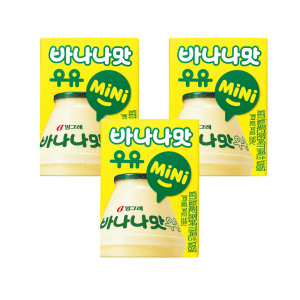

In [56]:
pil.open("datas/003.png")